# Cris Working Notebook
___

# 1.10 Friday - Data Mapping

In [1]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv")
labels = pd.read_csv("train_labels.csv")
specs = pd.read_csv("specs.csv")

In [ ]:
print(f"dataset: {len(train)}")
print(f"event_id: {len(train.event_id)}")
print(f"game_session: {len(train.game_session)}")
print(" ")
print(f"unique event_codes: {len(train.event_code.unique())}")
print(f"unique title: {len(train.title.unique())}")

In [ ]:
train.head()

In [ ]:
train[train.world == "MAGMAPEAK"].groupby(["type","title"])["world"].count()

In [ ]:
magma = train[train.world == "MAGMAPEAK"]

In [ ]:
print(f"{train.type.value_counts()}")
print(len(train.event_id))

In [ ]:
len(train.event_id.unique())

In [ ]:
len(train.title.unique())

In [ ]:
len(train.event_code.unique())

In [ ]:
train.event_code.value_counts()

In [ ]:
bdf = pd.merge(train,specs,on="event_id")

In [ ]:
df = bdf[["event_code","event_id","info"]].sample(100_000)

In [ ]:
df[df.event_code==4035]

In [ ]:
labels.head()

---

# 1.13 MON - Hypothesis Testing

## Summary of Insights:
1. There's a Very Weak Negative Correlation between the no. of assessments taken by a user, and their average accuracy.
 - This tells me that the accuracy is not about the amount of times assessments are taken.
 - There are distinct low, average, high performers - why?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle

## Are the of Assessment Taken and Average Accuracy Correlated to Each Other?

### Look at data

In [3]:
big = wrangle.get_assessment_users()

In [34]:
big.head(10)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
5,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:18.474000+00:00,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
6,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:19.365000+00:00,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
7,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06 04:58:21.490000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,6,3110,6954,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
8,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:22.732000+00:00,"{""coordinates"":{""x"":809,""y"":180,""stage_width"":...",0006a69f,7,4070,8187,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
9,5e812b27,2b9d5af79bcdb79f,2019-08-06 04:58:23.295000+00:00,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",0006a69f,8,4030,8745,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [4]:
print("Accuracy Measures:")
sorted(big.accuracy.unique())

Accuracy Measures:


[nan,
 0.0,
 0.024390243902439025,
 0.025,
 0.03448275862068965,
 0.037037037037037035,
 0.04,
 0.041666666666666664,
 0.043478260869565216,
 0.045454545454545456,
 0.047619047619047616,
 0.05,
 0.05263157894736842,
 0.05555555555555555,
 0.05882352941176471,
 0.0625,
 0.06666666666666668,
 0.07142857142857142,
 0.07692307692307693,
 0.08333333333333333,
 0.09090909090909093,
 0.1,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

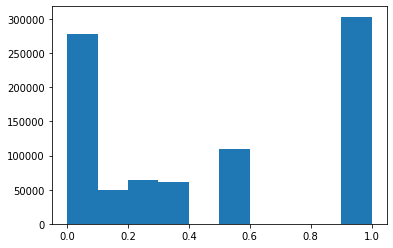

In [5]:
plt.hist(x="accuracy",data=big)
plt.show()

In [6]:
print(f"no. of unique installation ids: {len(big.installation_id.unique())}")

no. of unique installation ids: 3614


### Trim data for analysis

In [43]:
assessment = big.groupby("installation_id")["accuracy_group"].agg(["count","mean"])

In [44]:
assessment.head()

,count,mean
installation_id,,
0006a69f,244,1.758197
0006c192,340,1.388235
00129856,40,3.000000
001d0ed0,194,1.432990
00225f67,37,0.000000


In [45]:
assessment.columns

Index(['count', 'mean'], dtype='object')

In [46]:
assessment.columns = ["no_assessment","ave_accuracy"]
assessment.head()

,no_assessment,ave_accuracy
installation_id,,
0006a69f,244,1.758197
0006c192,340,1.388235
00129856,40,3.000000
001d0ed0,194,1.432990
00225f67,37,0.000000


In [47]:
assessment.describe()

,no_assessment,ave_accuracy
count,3614.000000,3614.000000
mean,239.470670,1.707530
std,347.777106,0.999410
min,6.000000,0.000000
25%,65.000000,1.000000
50%,139.000000,1.741090
75%,280.000000,2.649942
max,7395.000000,3.000000


In [81]:
#get_iqr
q1 = assessment.no_assessment.quantile(0.25)
q3 = assessment.no_assessment.quantile(0.75)
iqr = q3 - q1

upper_fence = q3 + 3 * iqr

filtered = assessment[assessment.no_assessment < upper_fence]

In [82]:
filtered.describe()

,no_assessment,ave_accuracy
count,3484.000000,3484.000000
mean,192.035591,1.718778
std,180.327941,1.010365
min,6.000000,0.000000
25%,62.000000,1.000000
50%,132.000000,1.776089
75%,261.000000,2.691104
max,924.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c044fd0>]],
      dtype=object)

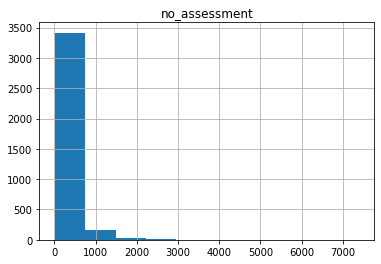

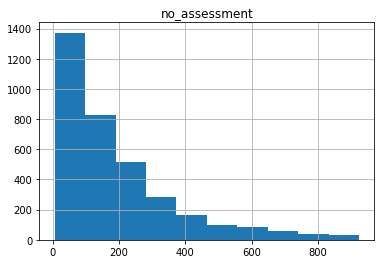

In [83]:
assessment.hist(column="no_assessment")
filtered.hist(column="no_assessment")

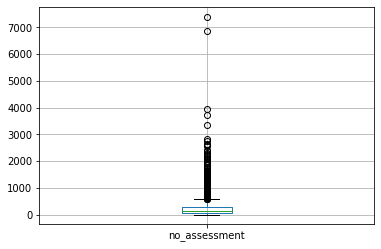

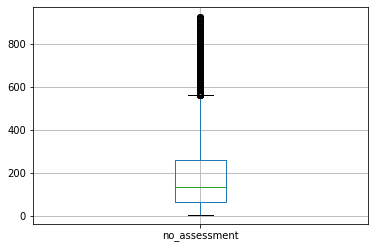

In [68]:
assessment.boxplot(column="no_assessment")
plt.show()
filtered.boxplot(column="no_assessment")
plt.show()

Text(0, 0.5, 'Ave Accuracy')

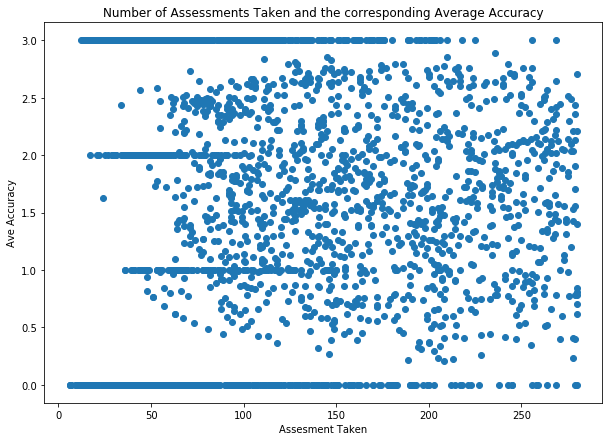

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(x="no_assessment",y="ave_accuracy",data=filtered[filtered.no_assessment <= 280])

plt.title("Number of Assessments Taken and the corresponding Average Accuracy")
plt.xlabel("Assesment Taken")
plt.ylabel("Ave Accuracy")

It seems like there are distinct low, average, high performers, that the amount of assessments they take does not matter. From the visualization, it does not seem like there is a correlation between the total no. of assessments taken, and the average accuracy. Nevertheless, let's do some statistical test to prove this.

There is more variability when the users take more assessments.

### Plan:
1. Take 10 random samples and get the pearson's r for the two variables, `no_assessment` and `ave_accuracy`.
    - Get 1084 observations per sample, which is 30% of the population (3614)
2. Get the mean of the pearson's r of these 5 random samples to see the strength of correlation.

In [70]:
s1 = filtered.sample(frac=.20)
s2 = filtered.sample(frac=.30)
s3 = filtered.sample(frac=.40)
s4 = filtered.sample(frac=.50)
s5 = filtered.sample(frac=.60)

Check that these samples are random.

In [71]:
s1.head()

,no_assessment,ave_accuracy
installation_id,,
aa8868b7,49,3.000000
685d9ac8,358,0.997207
a139c1d4,692,1.354046
2eb7fd3a,43,2.000000
a6eb1072,224,1.330357


In [72]:
s2.head()

,no_assessment,ave_accuracy
installation_id,,
7165c133,898,1.736080
53c44c05,62,3.000000
50c57027,121,1.661157
3b2a487c,70,3.000000
df18c892,172,2.145349


In [73]:
print(f"shape of sample 3: {s3.shape}")
print(f"shape of sample 4: {s4.shape}")
print(f"shape of sample 5: {s5.shape}")

shape of sample 3: (1394, 2)
shape of sample 4: (1742, 2)
shape of sample 5: (2090, 2)


In [74]:
r1, pval1 = stats.pearsonr(s1.no_assessment, s1.ave_accuracy)
r2, pval2 = stats.pearsonr(s2.no_assessment, s2.ave_accuracy)
r3, pval3 = stats.pearsonr(s3.no_assessment, s3.ave_accuracy)
r4, pval4 = stats.pearsonr(s4.no_assessment, s4.ave_accuracy)
r5, pval5 = stats.pearsonr(s5.no_assessment, s5.ave_accuracy)

In [75]:
samples = [s1,s2,s3,s4,s5]
sample_size = [len(sample) for sample in samples]

In [76]:
pearsons_r = [r1,r2,r3,r4,r5]
pvalue = [pval1,pval2, pval3, pval4, pval5]

In [77]:
metric_table = pd.DataFrame({"sample":["s1","s2","s3","s4","s5"],"pearsons_r":pearsons_r,"pvalue":pvalue,"sample_size":sample_size})

In [78]:
metric_table.head()

,sample,pearsons_r,pvalue,sample_size
0,s1,-0.138897,2.348430e-04,697
1,s2,-0.147369,1.715322e-06,1045
2,s3,-0.157334,3.509309e-09,1394
3,s4,-0.126294,1.232868e-07,1742
4,s5,-0.150712,4.344918e-12,2090


In [79]:
print(f"Average Pearsons R: {metric_table.pearsons_r.mean()}")
print("Very Weak Negative Relationship")

Average Pearsons R: -0.14412096095565216
Very Weak Negative Relationship


## What's the relationship between the type of activity engage in and their accuracy score? Are the users who did all three activities (game, activity, clip) in combination have higher accuracy scores?

In [23]:
import pandas as pd
import numpy as np
import wrangle

In [27]:
activity = big[["installation_id","type","accuracy"]]
activity.head()

,installation_id,type,accuracy
0,0006a69f,Clip,NaN
1,0006a69f,Clip,NaN
2,0006a69f,Activity,NaN
3,0006a69f,Activity,NaN
4,0006a69f,Activity,NaN


In [28]:
activity["c"] = np.where(activity.type=="Clip", 1, 0)
activity["a"] = np.where(activity.type=="Activity", 1, 0)
activity["g"] = np.where(activity.type=="Game", 1, 0)

In [29]:
activity.head()

,installation_id,type,accuracy,c,a,g
0,0006a69f,Clip,NaN,1,0,0
1,0006a69f,Clip,NaN,1,0,0
2,0006a69f,Activity,NaN,0,1,0
3,0006a69f,Activity,NaN,0,1,0
4,0006a69f,Activity,NaN,0,1,0


In [30]:
act_c = activity.groupby("installation_id").c.sum()
act_a = activity.groupby("installation_id").a.sum()
act_g = activity.groupby("installation_id").g.sum()

In [31]:
#check if index match
# all(act_a.index == act_c.index)
# all(act_a.index == act_g.index)

In [32]:
act_agg = pd.DataFrame(act_c)
act_agg = act_agg.join([act_a,act_g])

In [41]:
act_agg.head()

,c,a,g
installation_id,,,
0006a69f,37,1771,1732
0006c192,32,1206,643
00129856,1,786,0
001d0ed0,38,76,712
00225f67,15,291,586


# 1.14 TUE - Feature Relationships

In [84]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle

## Acquire Data

In [85]:
big = wrangle.get_assessment_users()

In [277]:
assessment_only = big[big.type=="Assessment"]

In [280]:
assessment_only_count = assessment_only.groupby(["installation_id","game_session","accuracy_group"]).count().reset_index()[["installation_id","game_session","accuracy_group"]]

In [282]:
assessment_only_count = pd.crosstab(assessment_only_count.installation_id,assessment_only_count.accuracy_group,margins=True).drop("All")["All"]

In [284]:
assessment_only_count.describe()

count    3614.000000
mean        4.894853
std         6.887616
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       156.000000
Name: All, dtype: float64

In [285]:
#get_iqr
q1 = assessment_only_count.quantile(0.25)
q3 = assessment_only_count.quantile(0.75)
iqr = q3 - q1

upper_fence = q3 + 3 * iqr

In [289]:
non_outlier = list((assessment_only_count <= upper_fence).index)

In [290]:
filtered = assessment_only[assessment_only.installation_id.isin(non_outlier)]

In [292]:
filtered.shape

(903605, 18)

In [293]:
filtered.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
647,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
648,db02c830,901acc108f55a5a1,2019-08-06 05:22:01.400000+00:00,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
649,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:01.403000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
650,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:05.242000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
651,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:05.244000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday


In [296]:
filtered.accuracy_group.value_counts(dropna=False)

3.0    303575
0.0    255079
1.0    197291
2.0    109502
NaN     38158
Name: accuracy_group, dtype: int64

In [297]:
non_outlier_df = filtered[filtered.accuracy_group.isna()==False]

In [298]:
non_outlier_df.accuracy_group.value_counts(dropna=False)

3.0    303575
0.0    255079
1.0    197291
2.0    109502
Name: accuracy_group, dtype: int64

In [303]:
non_outlier_df = non_outlier_df.sort_values(by=["installation_id","timestamp"])

In [305]:
#wla - without last accuracy
actual_y = non_outlier_df.drop_duplicates(subset="installation_id",keep="last",inplace=False)

In [306]:
actual_y.shape

(3614, 18)

In [309]:
actual_train = non_outlier_df[~non_outlier_df.index.isin(actual_y.index)]

In [313]:
actual_train.type.value_counts(dropna=False)

Assessment    861833
Name: type, dtype: int64

In [314]:
actual_y.to_csv("actual_y.csv", index=False)
actual_train.to_csv("actual_train.csv",index=False)

## Scale data for nomal distribution

In [99]:
non_outliers = list(filtered.index)

In [96]:
big.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [100]:
# normal_df = big[big.installation_id.isin(non_outliers)]
# normal_df.to_csv("normal.csv",index=False)

In [121]:
normal = pd.read_csv("normal.csv")

KeyboardInterrupt: 

In [185]:
normal.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [186]:
to_filter = normal[normal.accuracy_group.isna()==False] #with assessment only

In [187]:
len(to_filter.installation_id.unique())

3484

In [188]:
to_filter.head(20)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
647,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
648,db02c830,901acc108f55a5a1,2019-08-06 05:22:01.400000+00:00,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
649,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:01.403000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
650,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:05.242000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
651,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:05.244000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
652,28ed704e,901acc108f55a5a1,2019-08-06 05:22:07.812000+00:00,"{""height"":4,""coordinates"":{""x"":329,""y"":550,""st...",0006a69f,6,4025,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
653,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:07.812000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,7,3110,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
654,9d29771f,901acc108f55a5a1,2019-08-06 05:22:07.816000+00:00,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,8,3021,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
655,c74f40cd,901acc108f55a5a1,2019-08-06 05:22:08.427000+00:00,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,9,3121,7084,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
656,28ed704e,901acc108f55a5a1,2019-08-06 05:22:09.742000+00:00,"{""height"":1,""coordinates"":{""x"":176,""y"":526,""st...",0006a69f,10,4025,8400,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday


In [189]:
to_filter = to_filter.sort_values(by=["installation_id","timestamp"])[["installation_id","timestamp","game_session","num_correct","num_incorrect","event_id","event_code","game_time","title","accuracy","accuracy_group"]]

In [205]:
to_filter.shape

(669052, 11)

In [182]:
#wla - without last accuracy
actual_y = to_filter.drop_duplicates(subset="installation_id",keep="last",inplace=False)

In [200]:
to_filter[to_filter.installation_id== "00129856"].head(150)

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group
6028,00129856,2019-09-22 16:32:30.575000+00:00,ae691ec5ad5652cf,1.0,0.0,f56e0afc,2000,0,Bird Measurer (Assessment),1.0,3.0
6029,00129856,2019-09-22 16:32:30.611000+00:00,ae691ec5ad5652cf,1.0,0.0,ec138c1c,2020,0,Bird Measurer (Assessment),1.0,3.0
6030,00129856,2019-09-22 16:32:30.621000+00:00,ae691ec5ad5652cf,1.0,0.0,1375ccb7,3010,0,Bird Measurer (Assessment),1.0,3.0
6031,00129856,2019-09-22 16:32:35.108000+00:00,ae691ec5ad5652cf,1.0,0.0,bdf49a58,3110,4598,Bird Measurer (Assessment),1.0,3.0
6032,00129856,2019-09-22 16:32:35.888000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,5355,Bird Measurer (Assessment),1.0,3.0
6033,00129856,2019-09-22 16:32:36.638000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,6115,Bird Measurer (Assessment),1.0,3.0
6034,00129856,2019-09-22 16:32:37.701000+00:00,ae691ec5ad5652cf,1.0,0.0,4a4c3d21,4025,7182,Bird Measurer (Assessment),1.0,3.0
6035,00129856,2019-09-22 16:32:38.742000+00:00,ae691ec5ad5652cf,1.0,0.0,a16a373e,4070,8215,Bird Measurer (Assessment),1.0,3.0
6036,00129856,2019-09-22 16:32:39.226000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,8699,Bird Measurer (Assessment),1.0,3.0
6037,00129856,2019-09-22 16:32:39.760000+00:00,ae691ec5ad5652cf,1.0,0.0,4a4c3d21,4025,9235,Bird Measurer (Assessment),1.0,3.0


In [206]:
actual_y.to_csv("actual_y.csv", index=False)
tent_train.to_csv("actual_train.csv",index=False)

In [207]:
tent_train.to_csv("actual_train.csv",index=False)

In [202]:
tent_train = to_filter[to_filter.index.isin(actual_y.index)==False]

In [203]:
tent_train.head()

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group
647,0006a69f,2019-08-06 05:22:01.344000+00:00,901acc108f55a5a1,1.0,0.0,3bfd1a65,2000,0,Mushroom Sorter (Assessment),1.0,3.0
648,0006a69f,2019-08-06 05:22:01.400000+00:00,901acc108f55a5a1,1.0,0.0,db02c830,2025,37,Mushroom Sorter (Assessment),1.0,3.0
649,0006a69f,2019-08-06 05:22:01.403000+00:00,901acc108f55a5a1,1.0,0.0,a1e4395d,3010,37,Mushroom Sorter (Assessment),1.0,3.0
650,0006a69f,2019-08-06 05:22:05.242000+00:00,901acc108f55a5a1,1.0,0.0,a52b92d5,3110,3901,Mushroom Sorter (Assessment),1.0,3.0
651,0006a69f,2019-08-06 05:22:05.244000+00:00,901acc108f55a5a1,1.0,0.0,a1e4395d,3010,3901,Mushroom Sorter (Assessment),1.0,3.0


In [204]:
tent_train.shape

(665568, 11)

In [211]:
tent_train[tent_train.game_session=="0336db4dee65ad4b"]

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group


# 1.15 WED - Relationships

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

In [21]:
big = pd.read_csv("train_maybe_final.csv")

In [22]:
big.head()

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [152]:
big.index.nunique()

3523

## Question: Is the time spent in practice affect the accuracy of the kid?

**ANSWER**  

**I NEED:**
1. the Practice Type to be not NAN
2. to see correlation using Pearsons R

**TO DO:**
1. Asssign every user a median accuracy.
 - Get a median accuracy per user
 - Assign median accuracy per row

**NOTES:**
 - Do the same with game and clip (build function)

In [23]:
user_median_acc = big.groupby("installation_id")[["accuracy"]].median().dropna().rename(columns={"accuracy":"user_median_acc"})

In [24]:
user_median_acc.head()

,user_median_acc
installation_id,
0006a69f,0.5
0006c192,0.5
00129856,1.0
001d0ed0,0.5
00225f67,0.0


In [25]:
big.set_index(keys="installation_id",inplace=True)

In [26]:
df = big.join(user_median_acc)

In [74]:
df.head()

,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_median_acc
installation_id,,,,,,,,,,,,,,,,,,,
0006a69f,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5
0006a69f,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5
0006a69f,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5
0006a69f,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5
0006a69f,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5


In [75]:
game_only = df[df.type == "Game"].reset_index().sort_values(by=["game_session","timestamp"])

In [150]:
df[~df.index.isin(game_only.index)]

,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_median_acc
installation_id,,,,,,,,,,,,,,,,,,,
00129856,6025,3bfd1a65,34abf0a24c2aaf91,2019-08-25 03:15:48.296000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,NaN,NaN,NaN,NaN,2019-08-25,3,Sunday,1.000000
00129856,6026,db02c830,34abf0a24c2aaf91,2019-08-25 03:15:48.368000+00:00,"{""event_count"":2,""game_time"":41,""event_code"":2...",2,2025,41,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,NaN,NaN,NaN,NaN,2019-08-25,3,Sunday,1.000000
00129856,6027,a1e4395d,34abf0a24c2aaf91,2019-08-25 03:15:48.374000+00:00,"{""description"":""Pull three mushrooms out of th...",3,3010,41,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,NaN,NaN,NaN,NaN,2019-08-25,3,Sunday,1.000000
00129856,6028,f56e0afc,ae691ec5ad5652cf,2019-09-22 16:32:30.575000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000
00129856,6029,ec138c1c,ae691ec5ad5652cf,2019-09-22 16:32:30.611000+00:00,"{""stage_number"":1,""event_count"":2,""game_time"":...",2,2020,0,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000
00129856,6030,1375ccb7,ae691ec5ad5652cf,2019-09-22 16:32:30.621000+00:00,"{""description"":""Use the caterpillars to measur...",3,3010,0,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000
00129856,6031,bdf49a58,ae691ec5ad5652cf,2019-09-22 16:32:35.108000+00:00,"{""description"":""Use the caterpillars to measur...",4,3110,4598,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000
00129856,6032,51102b85,ae691ec5ad5652cf,2019-09-22 16:32:35.888000+00:00,"{""hat"":0,""caterpillar"":""middle"",""coordinates"":...",5,4030,5355,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000
00129856,6033,51102b85,ae691ec5ad5652cf,2019-09-22 16:32:36.638000+00:00,"{""hat"":0,""caterpillar"":""middle"",""coordinates"":...",6,4030,6115,Bird Measurer (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-09-22,16,Sunday,1.000000


In [ ]:
# length=456

In [29]:
game_only.head()

,installation_id,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_median_acc
1870344,b57e4a95,4668089,51311d7a,000050630c4b081b,2019-08-26 16:18:46.977000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",1,2000,0,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870345,b57e4a95,4668090,5be391b5,000050630c4b081b,2019-08-26 16:18:49.306000+00:00,"{""coordinates"":{""x"":870,""y"":345,""stage_width"":...",2,4010,2537,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870346,b57e4a95,4668091,c6971acf,000050630c4b081b,2019-08-26 16:18:51.644000+00:00,"{""round"":0,""event_count"":3,""game_time"":4804,""e...",3,2060,4804,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870347,b57e4a95,4668092,a29c5338,000050630c4b081b,2019-08-26 16:18:51.653000+00:00,"{""description"":""Our competitors are getting th...",4,3010,4804,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870348,b57e4a95,4668093,7f0836bf,000050630c4b081b,2019-08-26 16:18:58.140000+00:00,"{""description"":""Our competitors are getting th...",5,3110,11355,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2


In [76]:
game_only.installation_id.nunique()

3067

In [30]:
#checking if per game_session, there's multiple timestamp
#answer is yes!
game_only.groupby(["installation_id","game_session"])[["timestamp"]].count().head()

timestamp
installation_id game_session               
0006a69f        0336db4dee65ad4b        131
                1623f262016185e4         64
                3422611c17545edd         90
                55d1292018d7f56d         35
                744663d06c3d0b65        150

In [31]:
game_only.timestamp = pd.to_datetime(game_only.timestamp)

In [32]:
game_only.head()

,installation_id,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_median_acc
1870344,b57e4a95,4668089,51311d7a,000050630c4b081b,2019-08-26 16:18:46.977000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",1,2000,0,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870345,b57e4a95,4668090,5be391b5,000050630c4b081b,2019-08-26 16:18:49.306000+00:00,"{""coordinates"":{""x"":870,""y"":345,""stage_width"":...",2,4010,2537,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870346,b57e4a95,4668091,c6971acf,000050630c4b081b,2019-08-26 16:18:51.644000+00:00,"{""round"":0,""event_count"":3,""game_time"":4804,""e...",3,2060,4804,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870347,b57e4a95,4668092,a29c5338,000050630c4b081b,2019-08-26 16:18:51.653000+00:00,"{""description"":""Our competitors are getting th...",4,3010,4804,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2
1870348,b57e4a95,4668093,7f0836bf,000050630c4b081b,2019-08-26 16:18:58.140000+00:00,"{""description"":""Our competitors are getting th...",5,3110,11355,Dino Drink,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-26,16,Monday,0.2


In [34]:
game_only[game_only.game_time == 0].event_code.value_counts()
game_only.game_time.value_counts()

0           24861
40647         106
86482         101
124840         86
127710         83
10705          71
41043          66
41734          59
62791          56
85265          51
30749          50
125894         47
17428          46
21894          45
38844          45
19747          44
87278          44
84184          43
133968         43
39468          43
125578         42
39894          42
9638           41
50881          41
40127          40
52261          40
35389          39
40229          39
25827          39
42065          39
            ...  
269211          1
267162          1
291734          1
281489          1
279440          1
308110          1
426952          1
441295          1
406494          1
508896          1
752246          1
623145          1
553495          1
547346          1
1477064         1
1116472         1
10481895        1
2338669         1
2191157         1
12653543        1
3329345         1
3902569         1
474111          1
484340          1
482291    

It seems like the event_code 2000 are the ones registering a 0 game_time. So let's drop rows where event_code == 0.

In [35]:
game_only = game_only[game_only.event_code != 2000]

In [36]:
game_only.game_time = game_only.game_time / 60_000

In [67]:
sum_game_time = game_only.groupby("installation_id")[["game_time"]].sum().rename(columns={"game_time":"total_game_time"})

In [72]:
sum_game_time.nunique()

total_game_time    3042
dtype: int64

In [77]:
aggregated = user_median_acc.join(sum_game_time).fillna(0)

In [78]:
aggregated

,user_median_acc,total_game_time
installation_id,,
0006a69f,0.500000,1374.655933
0006c192,0.500000,800.373667
00129856,1.000000,0.000000
001d0ed0,0.500000,132.473917
00225f67,0.000000,449.467467
00279ac5,0.000000,4045.828367
002db7e3,0.200000,2419.993017
003372b0,1.000000,1408.484267
004c2091,1.000000,2.127083


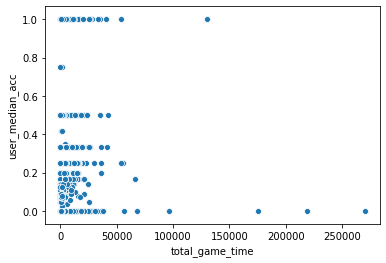

In [79]:
sns.scatterplot(x="total_game_time",y="user_median_acc",data=aggregated)

### Outliers are interesting...no matter how much time they spent in games, they're scoring 0.
### Distinct clusters, again are prevalent.

In [84]:
# filtering out obvious outliers to have a better picture

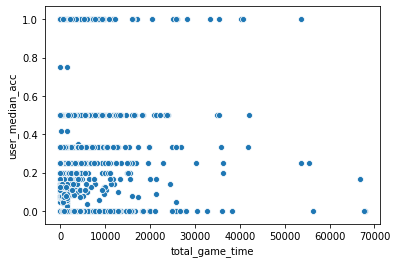

In [83]:
sns.scatterplot(x="total_game_time",y="user_median_acc",data=aggregated[aggregated.total_game_time < 80000])
plt.show()

In [101]:
#scaling
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

In [102]:
# mm = MinMaxScaler()
# ss = StandardScaler()
# aggregated["total_game_time_scaled"] = ss.fit_transform(aggregated[["total_game_time"]])

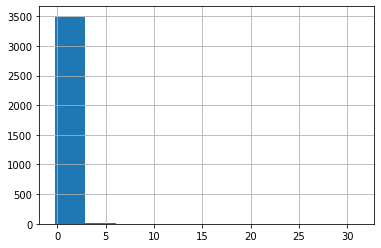

In [103]:
# aggregated.total_game_time_scaled.hist()
# plt.show()

### Power Transformer gave the best scaling

In [104]:
bc = PowerTransformer(method="yeo-johnson")
aggregated["total_game_time_scaled"] = bc.fit_transform(aggregated[["total_game_time"]])

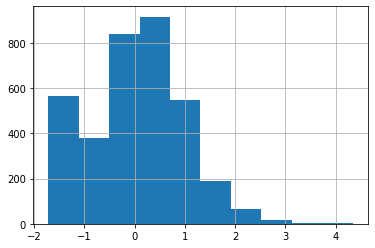

In [105]:
aggregated.total_game_time_scaled.hist()
plt.show()

In [106]:
r, pval = stats.pearsonr(aggregated.total_game_time_scaled,aggregated.user_median_acc)
print(r,pval)

-0.06832181350315045 4.9381385831404797e-05


In [112]:
s1 = aggregated.sample(n=500)
s2 = aggregated.sample(n=1000)
s3 = aggregated.sample(n=1500)
s4 = aggregated.sample(n=2000)
s5 = aggregated.sample(n=3000)

In [113]:
samples = [s1,s2,s3,s4,s5]
sample_size = [len(sample) for sample in samples]

In [114]:
pearsons_r = []
pvalue = []

for sample in samples:
    r,pval = stats.pearsonr(sample["total_game_time_scaled"],sample["user_median_acc"])
    pearsons_r.append(r)
    pvalue.append(pval)

comparison_table = pd.DataFrame({"sample":["s1","s2","s3","s4","s5"],"pearsons_r":pearsons_r,"pvalue":pvalue,"sample_size":sample_size})

In [115]:
comparison_table

,sample,pearsons_r,pvalue,sample_size
0,s1,-0.068249,0.127499,500
1,s2,-0.073385,0.020294,1000
2,s3,-0.077395,0.002704,1500
3,s4,-0.072383,0.001198,2000
4,s5,-0.058302,0.001400,3000


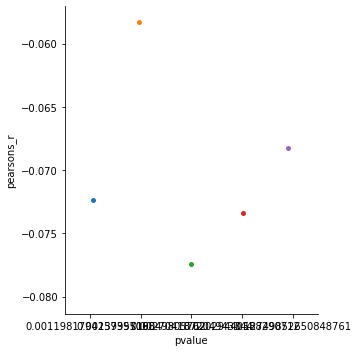

In [116]:
sns.catplot(x="pvalue",y="pearsons_r",data=comparison_table)
plt.show()

## No. of Game Session

In [129]:
no_gs = game_only.groupby(["installation_id"])[["game_session"]].count().rename(columns={"game_session":"no_game_session"})

In [158]:
aggregated = aggregated.join(no_gs).fillna(0)

In [163]:
aggregated.rename(columns={"no_game_session":"count_game_session"},inplace=True)

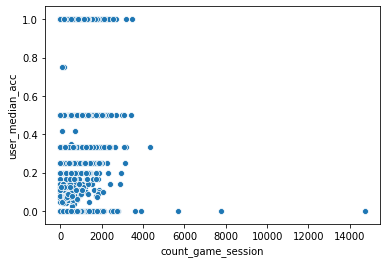

In [165]:
sns.scatterplot(x="count_game_session",y="user_median_acc",data=aggregated)
plt.show()

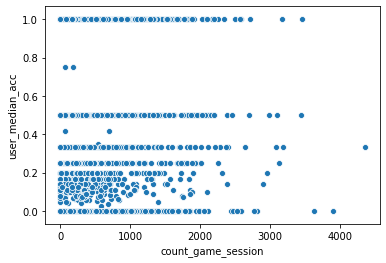

In [166]:
sns.scatterplot(x="count_game_session",y="user_median_acc",data=aggregated[aggregated.count_game_session<5000])
plt.show()

In [167]:
r, pval = stats.pearsonr(aggregated[aggregated.count_game_session<10000].count_game_session, aggregated[aggregated.count_game_session<10000].user_median_acc)
print(r)
print(pval)

-0.07213935638709884
1.8251067374156298e-05


## No. of Events / Session

In [195]:
no_ev = game_only.groupby(["installation_id"])[["event_count"]].sum().rename(columns={"event_id":"count_event_id"})

In [196]:
aggregated = aggregated.join(no_ev).fillna(0)

In [199]:
aggregated.rename(columns={"event_count":"count_event_id"},inplace=True)

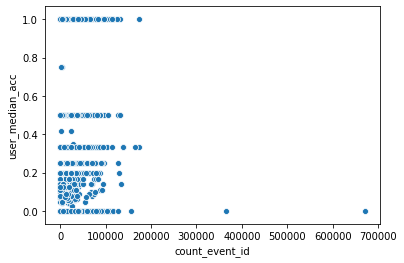

In [201]:
sns.scatterplot(x="count_event_id",y="user_median_acc",data=aggregated)
plt.show()

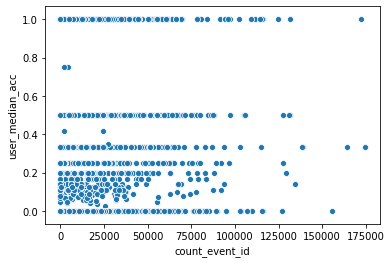

In [202]:
sns.scatterplot(x="count_event_id",y="user_median_acc",data=aggregated[aggregated.count_event_id<200000])
plt.show()

# 1.16 THU - Exploring Aggregated Features

Is there a way I can create a new feature to capture the "Nature" of the kid?
 - Clusters based 

In [203]:
user_max_acc = big.groupby("installation_id")[["accuracy"]].max().dropna().rename(columns={"accuracy":"user_max_acc"})

In [204]:
user_max_acc.user_max_acc.value_counts(normalize=True)

1.000000    0.744252
0.000000    0.129719
0.500000    0.070111
0.333333    0.025546
0.250000    0.013909
0.200000    0.004825
0.166667    0.004542
0.142857    0.003122
0.125000    0.001703
0.111111    0.000568
0.100000    0.000568
0.090909    0.000284
0.066667    0.000284
0.076923    0.000284
0.083333    0.000284
Name: user_max_acc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a247a0c18>]],
      dtype=object)

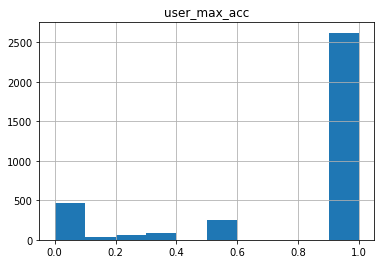

In [205]:
user_max_acc.hist()

In [216]:
aggregated = aggregated.join(user_max_acc)

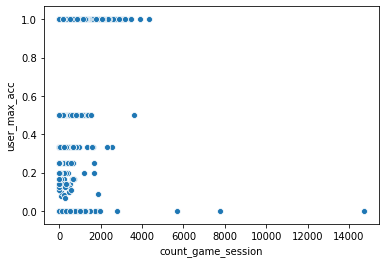

In [218]:
sns.scatterplot(x="count_game_session",y="user_max_acc",data=aggregated)
plt.show()

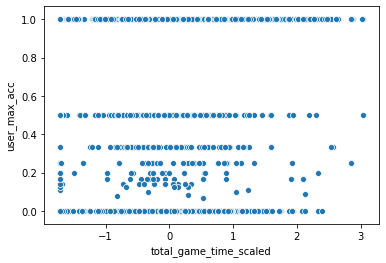

In [221]:
sns.scatterplot(x="total_game_time_scaled",y="user_max_acc",data=aggregated[aggregated.total_game_time < 80000])
plt.show()

In [222]:
big.head()

,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_max_acc
installation_id,,,,,,,,,,,,,,,,,,,
0006a69f,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,1.0
0006a69f,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,1.0
0006a69f,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,1.0
0006a69f,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,1.0
0006a69f,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,1.0


In [227]:
big[big.type == "Assessment"].num_correct.value_counts(dropna=False)

1.0    507041
0.0    208356
NaN     33035
Name: num_correct, dtype: int64

In [226]:
big[big.type == "Assessment"].num_incorrect.value_counts(dropna=False)

0.0     255104
1.0     129244
2.0      83007
3.0      61003
4.0      43054
5.0      33826
NaN      33035
6.0      20944
7.0      16692
8.0      14448
10.0      9968
9.0       8536
11.0      7146
13.0      4431
12.0      4394
14.0      4075
17.0      2569
18.0      1879
16.0      1649
15.0      1562
20.0      1430
21.0      1141
19.0      1047
23.0       972
34.0       723
85.0       697
79.0       593
60.0       579
40.0       541
28.0       467
24.0       450
22.0       430
29.0       401
46.0       309
45.0       301
35.0       300
54.0       287
27.0       236
32.0       234
41.0       202
26.0       180
39.0       176
49.0       170
Name: num_incorrect, dtype: int64

In [231]:
big[big.type == "Assessment"][["game_session","event_id","num_correct","num_incorrect","accuracy","accuracy_group"]]

,game_session,event_id,num_correct,num_incorrect,accuracy,accuracy_group
installation_id,,,,,,
0006a69f,901acc108f55a5a1,3bfd1a65,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,db02c830,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,a1e4395d,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,a52b92d5,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,a1e4395d,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,28ed704e,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,a52b92d5,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,9d29771f,1.0,0.0,1.000000,3.0
0006a69f,901acc108f55a5a1,c74f40cd,1.0,0.0,1.000000,3.0


In [236]:
big.tail(1)

,Unnamed: 0,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,user_max_acc
installation_id,,,,,,,,,,,,,,,,,,,
ffeb0b1b,6616238,2b058fe3,5448d652309a6324,2019-09-22 02:07:31.963000+00:00,"{""session_duration"":71511,""event_count"":61,""ga...",61,2010,71511,Cauldron Filler (Assessment),Assessment,MAGMAPEAK,1.0,2.0,0.333333,1.0,2019-09-22,2,Sunday,0.333333


In [299]:
assessment_only = big[big.type=="Assessment"].dropna()

In [307]:
grading = assessment_only.groupby(["installation_id","game_session"])["num_correct","num_incorrect","accuracy"].agg(["sum","mean"]).reset_index()

In [308]:
grading = grading.drop(grading.num_correct["mean"])

In [311]:
grading.head(10)

installation_id      game_session num_correct      num_incorrect       \
                                             sum mean           sum mean   
2         0006a69f  901acc108f55a5a1        48.0  1.0           0.0  0.0   
3         0006a69f  9501794defd84e4d        42.0  1.0          42.0  1.0   
4         0006a69f  a9ef3ecb3d1acc6a        32.0  1.0           0.0  0.0   
5         0006c192  197a373a77101924        24.0  1.0           0.0  0.0   
6         0006c192  957406a905d59afd       200.0  1.0         200.0  1.0   
7         0006c192  b2297d292892745a         0.0  0.0         464.0  4.0   
8         00129856  ae691ec5ad5652cf        40.0  1.0           0.0  0.0   
9         001d0ed0  7b536271e99518f0         0.0  0.0         255.0  5.0   
10        001d0ed0  8fdd5d389d0e272e         0.0  0.0          29.0  1.0   
11        001d0ed0  9480b026e3e7d371        13.0  1.0           0.0  0.0   

   accuracy       
        sum mean  
2      48.0  1.0  
3      21.0  0.5  
4      32.0  1.0  
5      24.0  1.0  
6     100.0  0.5  
7       0.0  0.0  
8      40.0  1.0  
9       0.0  0.0  
10      0.0  0.0  
11     13.0  1.0

In [310]:
grading.index

Int64Index([    2,     3,     4,     5,     6,     7,     8,     9,    10,
               11,
            ...
            14530, 14531, 14532, 14533, 14534, 14535, 14536, 14537, 14538,
            14539],
           dtype='int64', length=14538)

## 12.17 FRI - Clustering

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

In [2]:
big = pd.read_csv("train_maybe_final.csv")

### MAX CEILING x INSTALLATION ID

In [3]:
big.head()

,Unnamed: 0,Unnamed: 0.1,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [4]:
assessment_only = big[big.type == "Assessment"].dropna()

In [27]:
max_ceiling = assessment_only.groupby(["installation_id","game_session"])[["accuracy"]].max().reset_index().sort_values(by=["installation_id","accuracy"],ascending=False)

In [32]:
max_ceiling = max_ceiling.drop_duplicates(subset="installation_id",keep="first")

In [33]:
max_ceiling.shape

(3523, 3)

In [28]:
# max_ceiling.sort_values(by=["installation_id","accuracy"],ascending=False)

In [22]:
max_ceiling.columns

Index(['installation_id', 'game_session', 'accuracy'], dtype='object')

In [31]:
max_ceiling.head(50)

,installation_id,game_session,accuracy
14537,ffeb0b1b,5448d652309a6324,0.333333
14539,ffeb0b1b,dadd1a4d8ac68ab0,0.333333
14538,ffeb0b1b,a6885ab824fbc32c,0.000000
14536,ffd2871d,b05a02b52d5c1f4c,1.000000
14530,ffc90c32,14de9db5ad7dd503,1.000000
14531,ffc90c32,460e8bdc2822b340,1.000000
14532,ffc90c32,7028e68b20c5f586,1.000000
14533,ffc90c32,8f59b0b22325ef96,1.000000
14535,ffc90c32,c996482b11d149dd,1.000000
14534,ffc90c32,98e91ee8ce88793b,0.333333


### LOWEST SCORE ACHIEVED x INSTALLATION ID

### MEDIAN SCORE x INSTALLATION ID

### RANGE SCORE x INSTALLATION ID

### BINS DEPENDING ON THEIR SCORE x INSTALLATION ID

### NO. OF INCORRECT x INSTALLATION ID